In [1]:
import pandas as pd

In [4]:
d1 = pd.read_excel('Датасет1_Отключения_ГВС.xlsx')
d2 = pd.read_excel('Датасет2_Отключения_ХВС.xlsx')
d3 = pd.read_excel('Датасет3_Дтп.xlsx')
d4 = pd.read_excel('Датасет4_Пожары.xlsx')

In [8]:
d = pd.concat([d1, d2, d3, d4])

In [10]:
d.to_excel('common_data.xlsx')

In [92]:
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import boxcox
import numpy as np

def trend_strength(ts, transf = True):

    ts = ts[~np.isnan(ts)]
    
    np.seterr(divide = 'ignore') 
    if transf:
        ts, _ = boxcox(ts)    
        
    decomp = seasonal_decompose(ts, model='additive', freq = 7)
    fits = decomp.trend + decomp.seasonal
    adj = decomp.observed - fits + np.nanmean(decomp.trend)
    
    v_adj = np.nanvar(adj)
    detrend = decomp.observed - decomp.trend
    deseason = decomp.observed - decomp.seasonal
    
    trend_strength = [max(0, min(1, 1 - v_adj/np.nanvar(deseason))) if np.nanvar(deseason) > 1e-10 else 0]
    season_strength = [max(0, min(1, 1 - v_adj/np.nanvar(detrend))) if np.nanvar(detrend) > 1e-10 else 0]
#     return trend_strength[0], season_strength[0]
    return decomp

In [13]:
d1

,Время регистрации,Категория,Идентификатор Еас адреса,Идентификатор Еас здания,Широта,Долгота,Район
0,2019-01-01 00:08:56,Слабый напор или отсутствие горячего водоснабж...,104577.0,87878.0,59.945053,30.341370,Центральный
1,2019-01-01 00:30:52,Слабый напор или отсутствие горячего водоснабж...,672649.0,18142.0,59.955637,30.420857,Красногвардейский
2,2019-01-01 00:41:28,Слабый напор или отсутствие горячего водоснабж...,109623.0,17696.0,59.918879,30.417112,Красногвардейский
3,2019-01-01 02:08:26,Слабый напор или отсутствие горячего водоснабж...,120210.0,65174.0,59.878327,29.914813,Петродворцовый
4,2019-01-01 02:19:32,Слабый напор или отсутствие горячего водоснабж...,672649.0,18142.0,59.955637,30.420857,Красногвардейский
...,...,...,...,...,...,...,...
58762,2020-08-12 23:05:39,Слабый напор или отсутствие горячего водоснабж...,673159.0,163221.0,59.946806,30.284101,Василеостровский
58763,2020-08-12 23:27:20,Слабый напор или отсутствие горячего водоснабж...,947574.0,80033.0,59.956863,30.231150,Василеостровский
58764,2020-08-12 23:35:52,Слабый напор или отсутствие горячего водоснабж...,40138.0,87405.0,59.937444,30.216083,Василеостровский
58765,2020-08-12 23:45:38,Слабый напор или отсутствие горячего водоснабж...,100618.0,83085.0,59.916202,30.325403,Адмиралтейский


In [62]:

d1['Dates'] = pd.to_datetime(d1['Время регистрации']).dt.date
d1['Time'] = pd.to_datetime(d1['Время регистрации']).dt.time

d2['Dates'] = pd.to_datetime(d2['Время регистрации']).dt.date
d2['Time'] = pd.to_datetime(d2['Время регистрации']).dt.time

d3['Dates'] = pd.to_datetime(d3['Время регистрации']).dt.date
d3['Time'] = pd.to_datetime(d3['Время регистрации']).dt.time

d4['Dates'] = pd.to_datetime(d4['Время регистрации']).dt.date
d4['Time'] = pd.to_datetime(d4['Время регистрации']).dt.time

In [22]:
d1

,Время регистрации,Категория,Идентификатор Еас адреса,Идентификатор Еас здания,Широта,Долгота,Район,Dates,Time
0,2019-01-01 00:08:56,Слабый напор или отсутствие горячего водоснабж...,104577.0,87878.0,59.945053,30.341370,Центральный,2019-01-01,00:08:56
1,2019-01-01 00:30:52,Слабый напор или отсутствие горячего водоснабж...,672649.0,18142.0,59.955637,30.420857,Красногвардейский,2019-01-01,00:30:52
2,2019-01-01 00:41:28,Слабый напор или отсутствие горячего водоснабж...,109623.0,17696.0,59.918879,30.417112,Красногвардейский,2019-01-01,00:41:28
3,2019-01-01 02:08:26,Слабый напор или отсутствие горячего водоснабж...,120210.0,65174.0,59.878327,29.914813,Петродворцовый,2019-01-01,02:08:26
4,2019-01-01 02:19:32,Слабый напор или отсутствие горячего водоснабж...,672649.0,18142.0,59.955637,30.420857,Красногвардейский,2019-01-01,02:19:32
...,...,...,...,...,...,...,...,...,...
58762,2020-08-12 23:05:39,Слабый напор или отсутствие горячего водоснабж...,673159.0,163221.0,59.946806,30.284101,Василеостровский,2020-08-12,23:05:39
58763,2020-08-12 23:27:20,Слабый напор или отсутствие горячего водоснабж...,947574.0,80033.0,59.956863,30.231150,Василеостровский,2020-08-12,23:27:20
58764,2020-08-12 23:35:52,Слабый напор или отсутствие горячего водоснабж...,40138.0,87405.0,59.937444,30.216083,Василеостровский,2020-08-12,23:35:52
58765,2020-08-12 23:45:38,Слабый напор или отсутствие горячего водоснабж...,100618.0,83085.0,59.916202,30.325403,Адмиралтейский,2020-08-12,23:45:38


C:\Users\Polina_Levina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


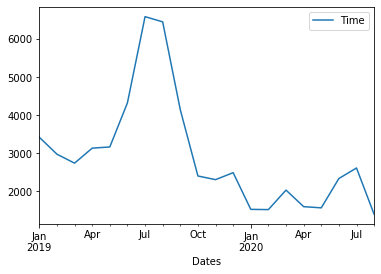

In [125]:
import sys
d1_series = d1[['Dates','Time']].groupby(['Dates']).count()
d2_series = d2[['Dates','Time']].groupby(['Dates']).count()
d3_series = d3[['Dates','Time']].groupby(['Dates']).count()
d4_series = d4[['Dates','Time']].groupby(['Dates']).count()

d1_sub = d1[['Dates','Time']]
d1_sub['Dates'] = pd.to_datetime(d1_sub['Dates'])
d1_sub = d1_sub.set_index('Dates')
d1_series_month = d1_sub.groupby([pd.Grouper(freq='M', level='Dates')]).count()
# DF_tr_num_w = DF_tr_num.groupby(
#     [pd.Grouper(level='rayon'), pd.Grouper(level='final_code'), pd.Grouper(level='point'),
#      pd.Grouper(freq='W', level='tr_date')]).sum()

d1_series_month.plot()

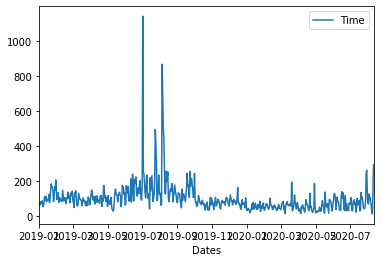

In [30]:
d1_series.plot()

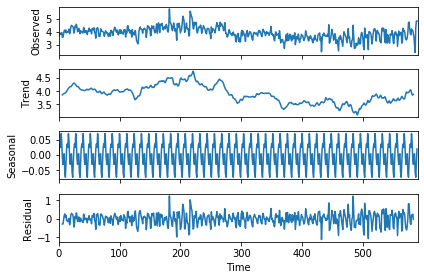

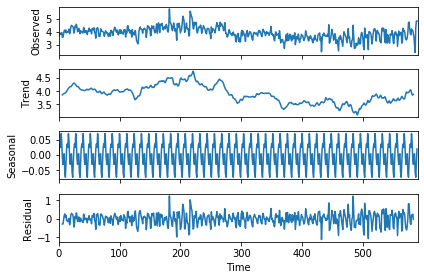

In [91]:
result = trend_strength(d1_series['Time'])
result.plot()

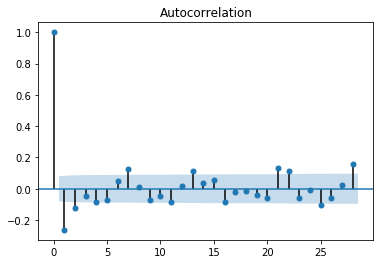

In [89]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf # для посчёта функции при разные значениях лага

plot_acf(d1_series.Time.diff().dropna());

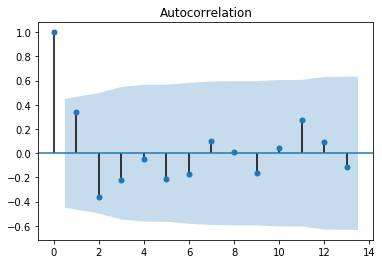

In [90]:
plot_acf(d1_series_month.Time.diff().dropna());

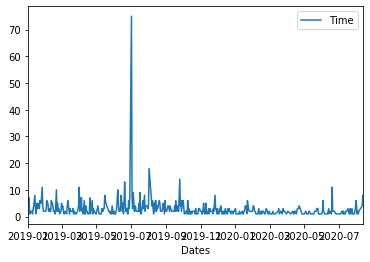

In [115]:
import datetime as dt

d1_night_m = d1[(d1['Time'] < dt.time(6, 0, 0))]
d1_series_night_m = d1_night_m[['Dates','Time']].groupby(['Dates']).count()
d1_series_night_m.plot()

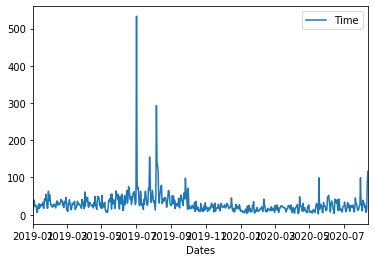

In [116]:
d1_morning = d1[(d1['Time'] > dt.time(6, 0, 0)) & (d1['Time'] < dt.time(12, 0, 0))]
d1_series_morning = d1_morning[['Dates','Time']].groupby(['Dates']).count()
d1_series_morning.plot()


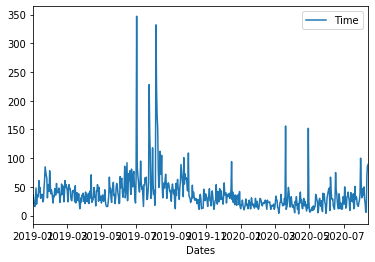

In [117]:
d1_day = d1[(d1['Time'] > dt.time(12, 0, 0)) & (d1['Time'] < dt.time(18, 0, 0))]
d1_series_day = d1_day[['Dates','Time']].groupby(['Dates']).count()
d1_series_day.plot()

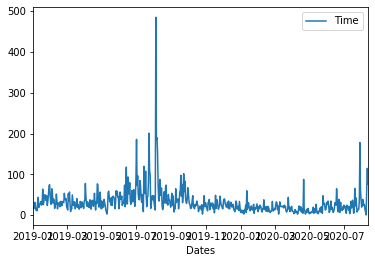

In [118]:
d1_night = d1[(d1['Time'] > dt.time(18, 0, 0))]
d1_series_night = d1_night[['Dates','Time']].groupby(['Dates']).count()
d1_series_night.plot()

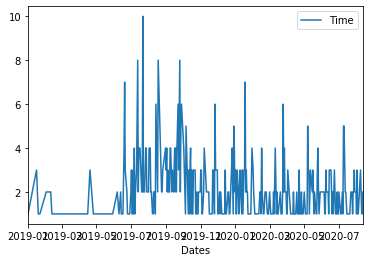

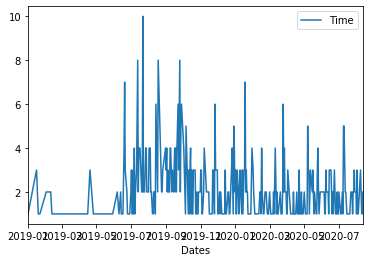

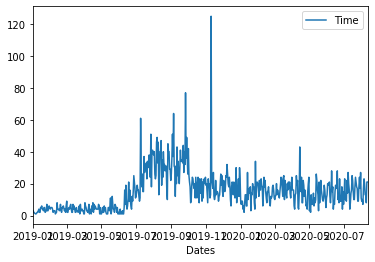

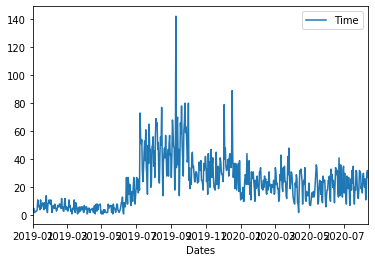

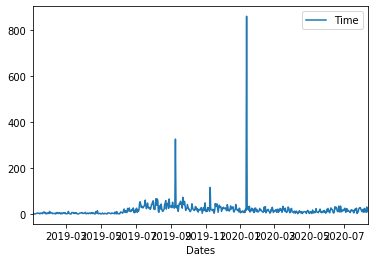

In [123]:
d2_night_m = d2[(d2['Time'] < dt.time(6, 0, 0))]
d2_series_night_m = d2_night_m[['Dates','Time']].groupby(['Dates']).count()
d2_series_night_m.plot()

d2_morning = d2[(d2['Time'] > dt.time(6, 0, 0)) & (d2['Time'] < dt.time(12, 0, 0))]
d2_series_morning = d2_morning[['Dates','Time']].groupby(['Dates']).count()
d2_series_morning.plot()

d2_day = d2[(d2['Time'] > dt.time(12, 0, 0)) & (d2['Time'] < dt.time(18, 0, 0))]
d2_series_day = d2_day[['Dates','Time']].groupby(['Dates']).count()
d2_series_day.plot()

d2_night = d2[(d2['Time'] > dt.time(18, 0, 0))]
d2_series_night = d2_night[['Dates','Time']].groupby(['Dates']).count()
d2_series_night.plot()

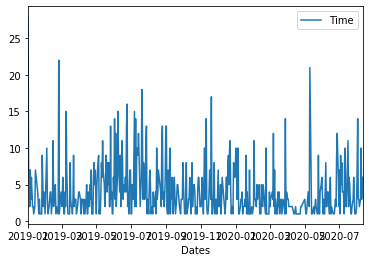

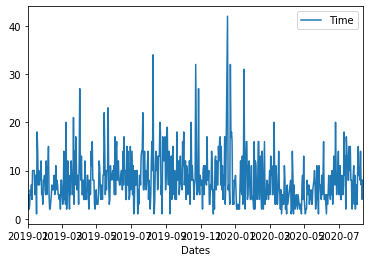

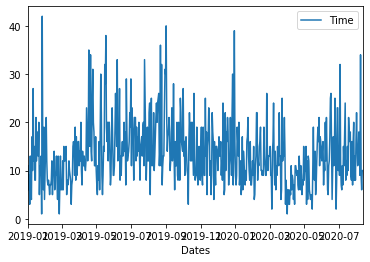

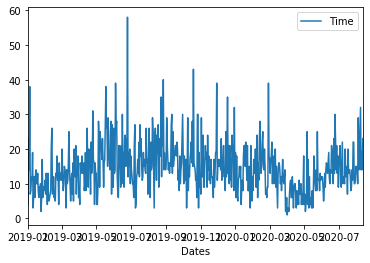

In [127]:
d3_night_m = d3[(d3['Time'] < dt.time(6, 0, 0))]
d3_series_night_m = d3_night_m[['Dates','Time']].groupby(['Dates']).count()
d3_series_night_m.plot()

d3_morning = d3[(d3['Time'] > dt.time(6, 0, 0)) & (d3['Time'] < dt.time(12, 0, 0))]
d3_series_morning = d3_morning[['Dates','Time']].groupby(['Dates']).count()
d3_series_morning.plot()

d3_day = d3[(d3['Time'] > dt.time(12, 0, 0)) & (d3['Time'] < dt.time(18, 0, 0))]
d3_series_day = d3_day[['Dates','Time']].groupby(['Dates']).count()
d3_series_day.plot()

d3_night = d3[(d3['Time'] > dt.time(18, 0, 0))]
d3_series_night = d3_night[['Dates','Time']].groupby(['Dates']).count()
d3_series_night.plot()

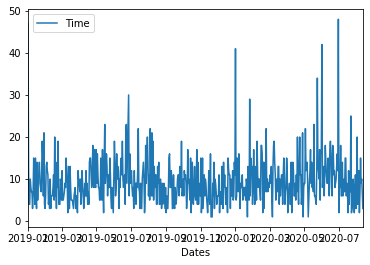

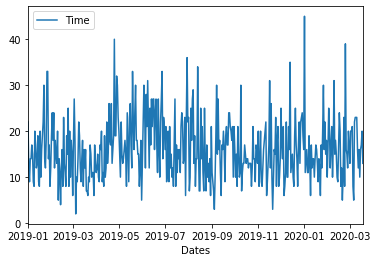

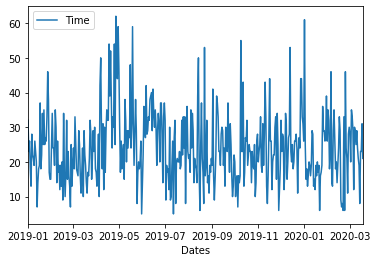

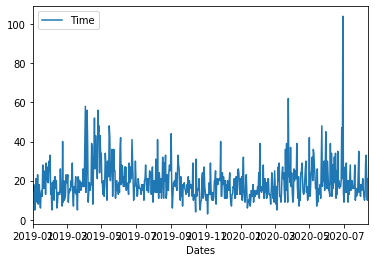

In [128]:
d4_night_m = d4[(d4['Time'] < dt.time(6, 0, 0))]
d4_series_night_m = d4_night_m[['Dates','Time']].groupby(['Dates']).count()
d4_series_night_m.plot()

d4_morning = d4[(d3['Time'] > dt.time(6, 0, 0)) & (d4['Time'] < dt.time(12, 0, 0))]
d4_series_morning = d4_morning[['Dates','Time']].groupby(['Dates']).count()
d4_series_morning.plot()

d4_day = d4[(d3['Time'] > dt.time(12, 0, 0)) & (d4['Time'] < dt.time(18, 0, 0))]
d4_series_day = d4_day[['Dates','Time']].groupby(['Dates']).count()
d4_series_day.plot()

d4_night = d4[(d4['Time'] > dt.time(18, 0, 0))]
d4_series_night = d4_night[['Dates','Time']].groupby(['Dates']).count()
d4_series_night.plot()

99.60508474576271
56.849152542372885
39.567796610169495
52.80847457627119


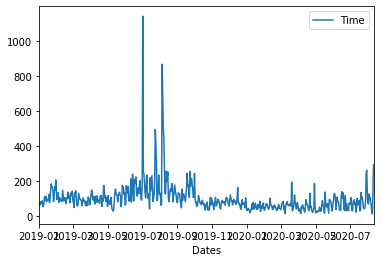

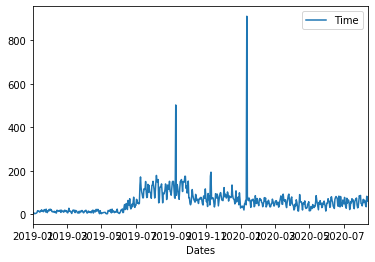

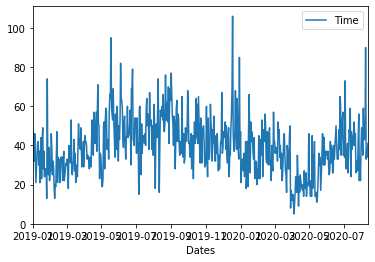

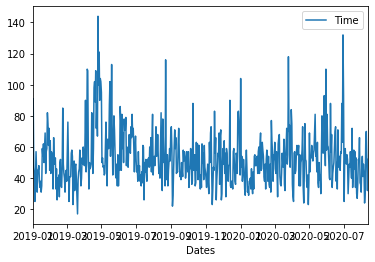

In [133]:
for i in [d1_series, d2_series, d3_series, d4_series]:
    print(np.mean(i['Time']))
    i.plot()

C:\Users\Polina_Levina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


691.3764705882353
394.6
274.6470588235294
366.5529411764706


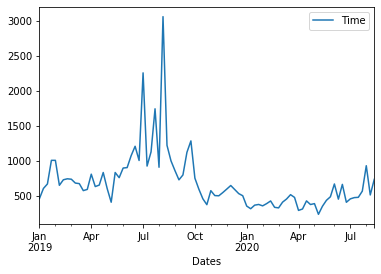

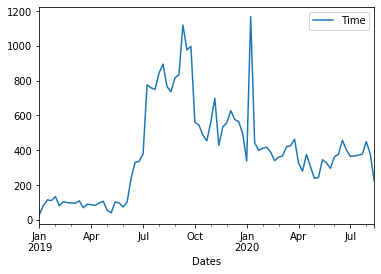

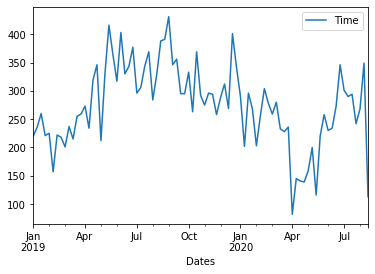

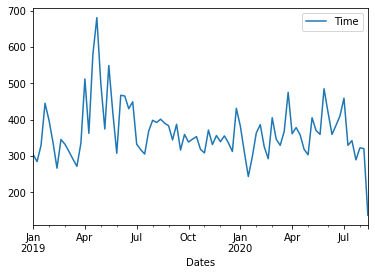

In [130]:
for i in [d1, d2, d3, d4]:
    d1_sub = i[['Dates','Time']]
    d1_sub['Dates'] = pd.to_datetime(d1_sub['Dates'])
    d1_sub = d1_sub.set_index('Dates')
    d1_series_weekly = d1_sub.groupby([pd.Grouper(freq='W', level='Dates')]).count()
    print(np.mean(d1_series_weekly['Time']))
    d1_series_weekly.plot()

C:\Users\Polina_Levina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


2938.35
1677.05
1167.25
1557.85


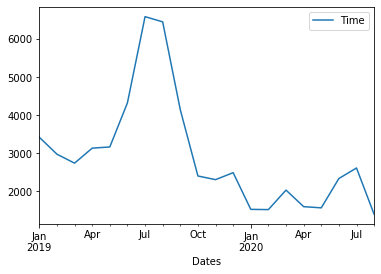

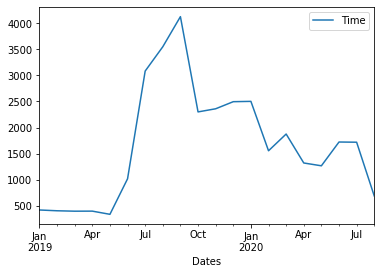

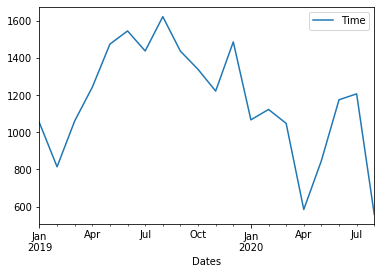

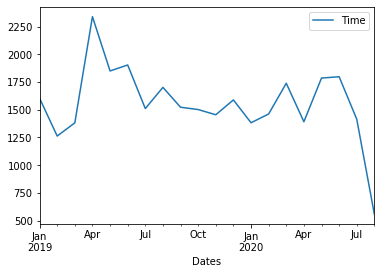

In [132]:
for i in [d1, d2, d3, d4]:
    d1_sub = i[['Dates','Time']]
    d1_sub['Dates'] = pd.to_datetime(d1_sub['Dates'])
    d1_sub = d1_sub.set_index('Dates')
    d1_series_monthly = d1_sub.groupby([pd.Grouper(freq='M', level='Dates')]).count()
    print(np.mean(d1_series_monthly['Time']))
    d1_series_monthly.plot()